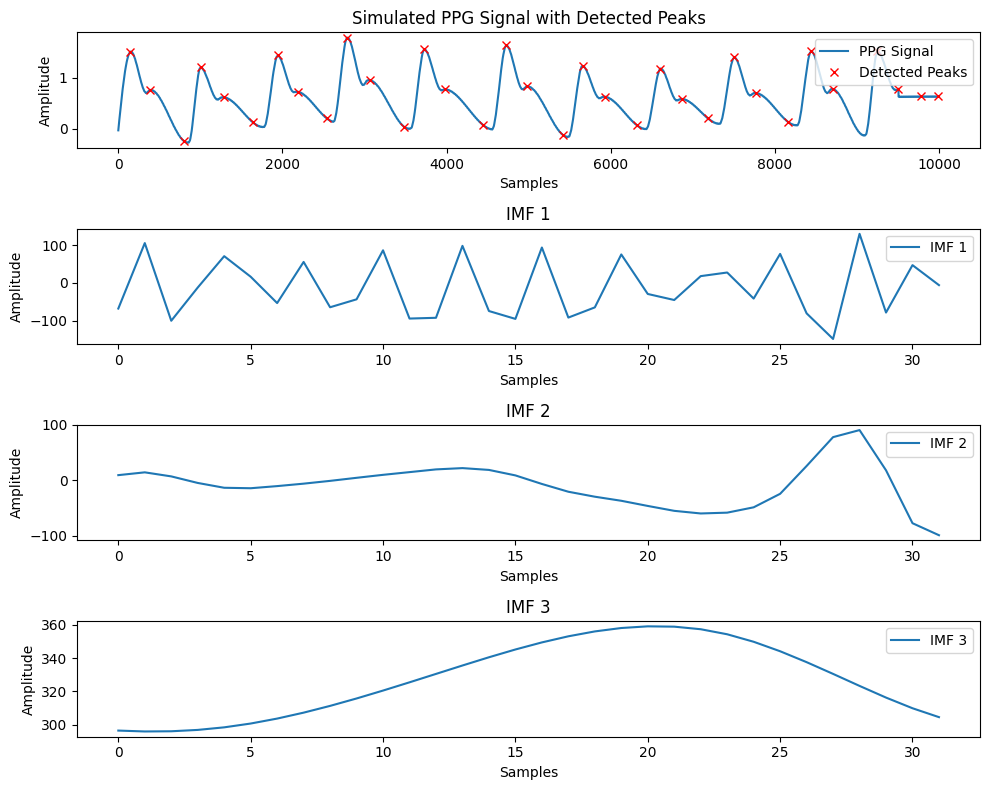

HF Power (IMF1): 5780.815277722229
LF Power (IMF2): 1598.1018252786366
LF/HF Ratio: 0.2764492114870559
IMF decomposition completed. Analyze the IMFs' frequency components for HRV insights.


In [25]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from PyEMD import EMD

# Step 1: Simulate a PPG signal (can change to ECG with nk.ecg_simulate)
duration = 10  # duration of the signal in seconds
heart_rate = 70  # 70 beats per minute (bpm)

ppg_signal = nk.ppg_simulate(duration=duration, heart_rate=heart_rate)

# Step 2: Find peaks (detect R-peaks or PPG peaks)
peaks, _ = find_peaks(ppg_signal, distance=200)  # 'distance' depends on the heart rate

# Calculate RR intervals (in samples)
rr_intervals = np.diff(peaks)  # Distance between consecutive peaks (RR intervals)

# Step 3: Apply EMD to the RR interval signal
emd = EMD()
imfs = emd.emd(rr_intervals)  # Decompose RR interval signal into IMFs

# Step 4: Plot the results
plt.figure(figsize=(10, 8))

# Plot the original PPG signal and detected peaks
plt.subplot(len(imfs) + 1, 1, 1)
plt.plot(ppg_signal, label="PPG Signal")
plt.plot(peaks, ppg_signal[peaks], 'rx', label="Detected Peaks")
plt.title("Simulated PPG Signal with Detected Peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

# Plot each IMF
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 2)
    plt.plot(imf, label=f"IMF {i+1}")
    plt.title(f"IMF {i+1}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

# Assuming `imfs` is the array of IMF components from PyEMD
# Calculate power of IMF[0] (HF) and IMF[1] (LF)
hf_power = np.mean(imfs[0]**2)
lf_power = np.mean(imfs[1]**2)

lf_hf_ratio = lf_power / hf_power

print(f"HF Power (IMF1): {hf_power}")
print(f"LF Power (IMF2): {lf_power}")
print(f"LF/HF Ratio: {lf_hf_ratio}")


# Calculate HRV features from IMFs
# Here, let's calculate the LF and HF components for example
# You can use Fourier Transform to analyze frequency components (LF, HF) of each IMF

# Placeholder for frequency-domain HRV analysis (LF/HF)
# You can apply FFT or other methods to analyze the IMFs' frequency components.
# For simplicity, we won't implement the full FFT here, but you can expand this with Fourier methods.

print("IMF decomposition completed. Analyze the IMFs' frequency components for HRV insights.")


Skipping random IBI modulation, since the offset_weight 0.99 leads to physiologically implausible wave durations of 6.430729143125813 milliseconds.


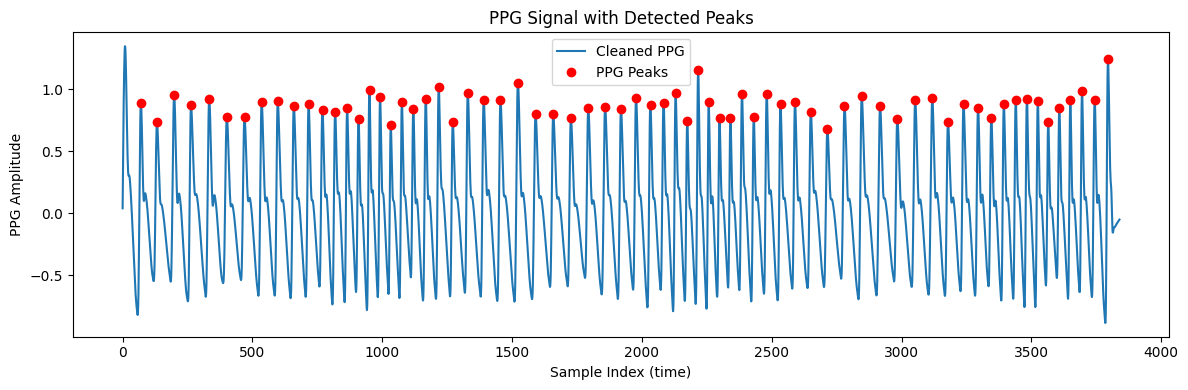

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,3074.0625,811.302654,NaN,NaN,NaN,NaN,NaN,NaN,1335.679119,1357.700776,...,987.5,0.607408,2480.0,3890.0,96.875,96.875,2000.0,5440.0,16.0,453.125


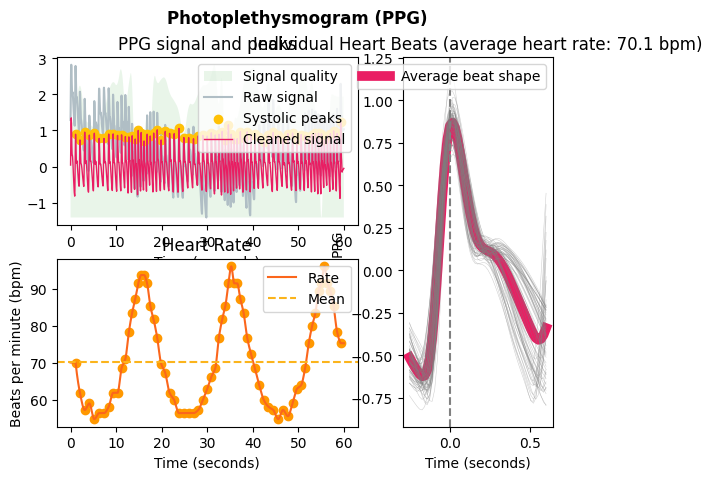

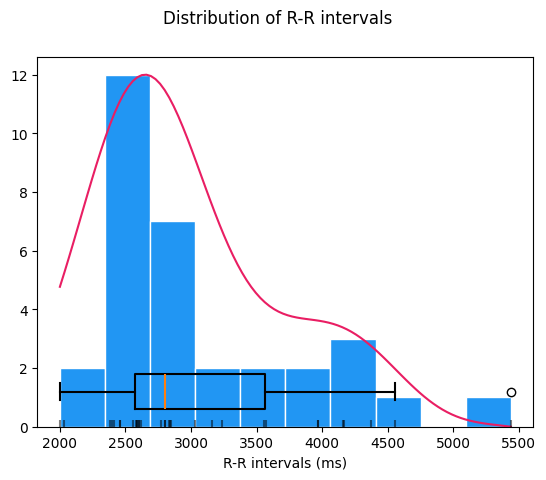

In [26]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt

fs = 64  # Sampling frequency (Hz)
duration = 60  # Duration of signal (seconds)
data = nk.ppg_simulate(duration=duration, 
                             sampling_rate=fs, 
                             heart_rate=70, 
                             frequency_modulation=0.5, 
                             ibi_randomness=1, 
                             drift=0.5, 
                             motion_amplitude=0.5, 
                             powerline_amplitude=0.5, 
                             burst_number=1, 
                             burst_amplitude=1, 
                             random_state=42, 
                             random_state_distort='spawn', 
                             show=False)


# Find peaks
signals, info = nk.ppg_process(data, sampling_rate=64, correct_artifacts=True, show=False)

# Step 2: Get the PPG cleaned signal and peak indices
ppg_cleaned = signals["PPG_Clean"]
ppg_peaks = info["PPG_Peaks"]

plt.figure(figsize=(12, 4))
plt.plot(ppg_cleaned, label="Cleaned PPG")
plt.plot(ppg_peaks, ppg_cleaned[ppg_peaks], "ro", label="PPG Peaks")  # Red dots on peaks
plt.title("PPG Signal with Detected Peaks")
plt.xlabel("Sample Index (time)")
plt.ylabel("PPG Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

nk.ppg_plot(signals, info)

# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time


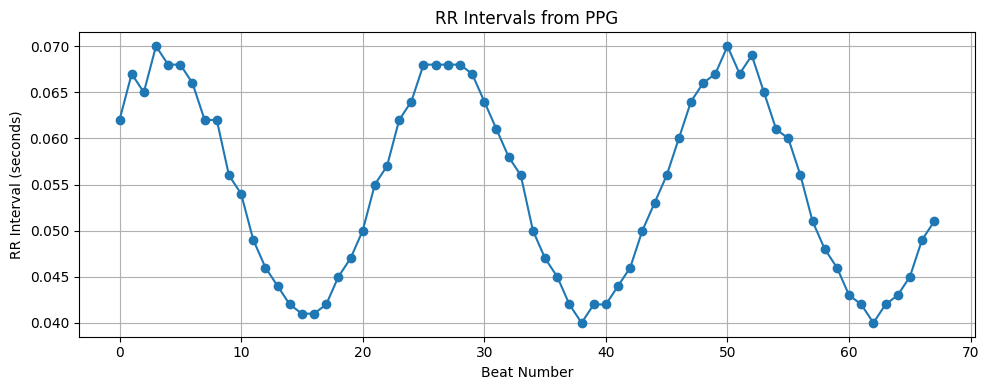

In [27]:
# Get the peak indices and convert to seconds
ppg_peaks = info["PPG_Peaks"]
sampling_rate = 1000
peak_times = np.array(ppg_peaks) / sampling_rate  # Time of each peak in seconds

# Calculate RR intervals (differences between peak times)
rr_intervals = np.diff(peak_times)

# Plot RR intervals
plt.figure(figsize=(10, 4))
plt.plot(rr_intervals, marker='o')
plt.title("RR Intervals from PPG")
plt.xlabel("Beat Number")
plt.ylabel("RR Interval (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.035413,0.001139,0.000007,0.036559,31.100246,0.968656,0.031146,-6.777893


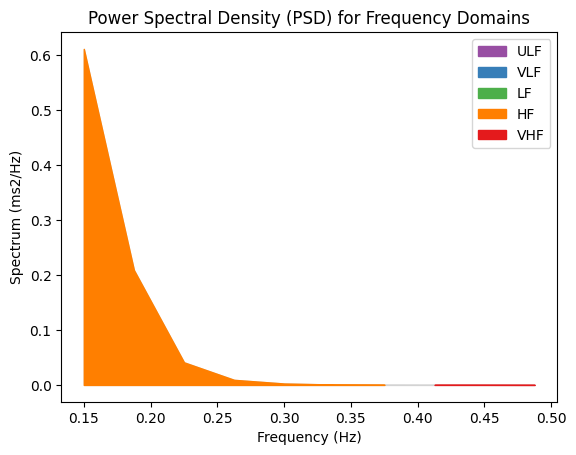

In [28]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True, normalize=True)
hrv_freq

c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,960.039426,618.352302,1.552577,1.864983e+06,0.644091,6.977645,1593.099448,0.65625,0.709677,1.0,...,1.386294,4.6875,1.402708,0.0,0.0,0.0,1.289697,2.120563,3.331515,0.78125


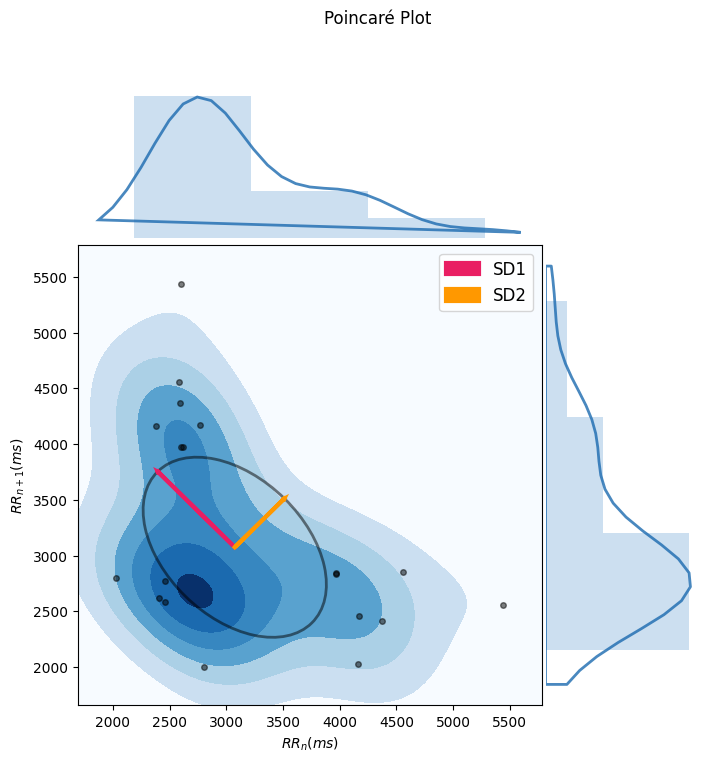

In [29]:
hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=100, show=True)
hrv_nonlinear

## Simulate the Analysis

In [7]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns

# Parameters
n_subjects = 20
duration = 60  # seconds
sampling_rate = 1000
hrv_features_list = []

for subject_id in range(1, n_subjects + 1):
    # Simulate baseline (normal)
    ppg_base = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=70)
    signals_base, _ = nk.ppg_process(ppg_base, sampling_rate=sampling_rate)
    hrv_base = nk.hrv(signals_base, sampling_rate=sampling_rate, show=False, measures=["time", "nonlinear"])
    hrv_base["Subject"] = subject_id
    hrv_base["Condition"] = "Baseline"

    # Simulate stressor (faster heart rate)
    ppg_stress = nk.ppg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=95)
    signals_stress, _ = nk.ppg_process(ppg_stress, sampling_rate=sampling_rate)
    hrv_stress = nk.hrv(signals_stress, sampling_rate=sampling_rate, show=False, measures=["time", "nonlinear"])
    hrv_stress["Subject"] = subject_id
    hrv_stress["Condition"] = "Stressor"

    hrv_features_list.extend([hrv_base, hrv_stress])

# Combine
hrv_df = pd.concat(hrv_features_list, ignore_index=True)
print(hrv_df.head())


c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller t

   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  855.676471  72.684031         NaN         NaN         NaN         NaN   
1  631.376344  53.379876         NaN         NaN         NaN         NaN   
2  857.382353  72.126760         NaN         NaN         NaN         NaN   
3  631.193548  52.431375         NaN         NaN         NaN         NaN   
4  855.823529  69.898848         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_FuzzyEn  HRV_MSEn  \
0         NaN         NaN  67.010915  67.498198  ...     1.227142  0.787471   
1         NaN         NaN  49.028718  49.295712  ...     1.233869  0.769239   
2         NaN         NaN  58.304527  58.726455  ...     1.156878  0.699320   
3         NaN         NaN  46.854771  47.106947  ...     1.162890  0.938457   
4         NaN         NaN  53.364978  53.765585  ...     1.232428  1.075653   

   HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC  Su

c:\Users\ACER\miniconda3\envs\codex_astartes\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


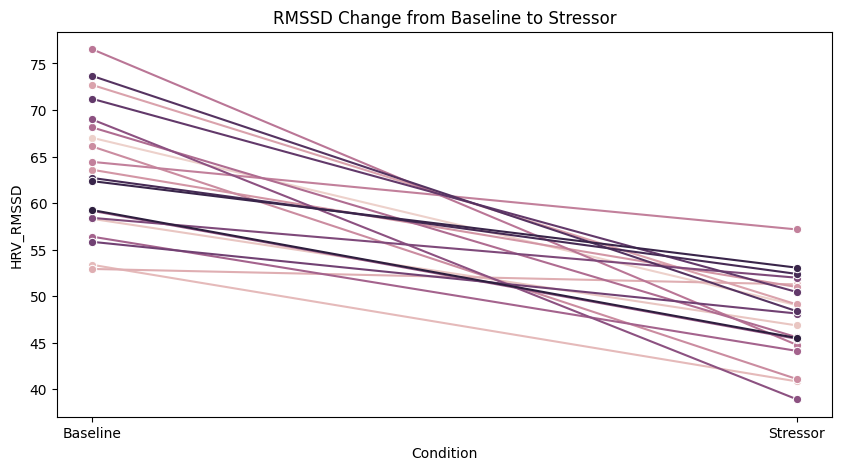

In [8]:
# Reshape for plotting
df_plot = hrv_df[["Subject", "Condition", "HRV_RMSSD"]]

# Line plot per subject
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="Condition", y="HRV_RMSSD", hue="Subject", marker="o", legend=False)
plt.title("RMSSD Change from Baseline to Stressor")
plt.show()


In [9]:
baseline = hrv_df[hrv_df["Condition"] == "Baseline"]["HRV_RMSSD"].values
stressor = hrv_df[hrv_df["Condition"] == "Stressor"]["HRV_RMSSD"].values

from scipy.stats import ttest_rel
t_stat, p_val = ttest_rel(baseline, stressor)
print(f"T-test result: t = {t_stat:.2f}, p = {p_val:.4f}")

T-test result: t = 8.45, p = 0.0000


In [10]:
# Example: Calculate the % change in RMSSD between baseline and stressor
hrv_df['RMSSD_Drop(%)'] = hrv_df.groupby('Subject')['HRV_RMSSD'].transform(
    lambda x: 100 * (x.iloc[1] - x.iloc[0]) / x.iloc[0]
)

# Add classification based on a rule (e.g., RMSSD drops by >= 30%)
hrv_df['Stress_Class'] = hrv_df['RMSSD_Drop(%)'].apply(lambda x: 'Stressed' if x >= 30 else 'Not Stressed')

# View the result
print(hrv_df[['Subject', 'Condition', 'RMSSD_Drop(%)', 'Stress_Class']].head())


   Subject Condition  RMSSD_Drop(%)  Stress_Class
0        1  Baseline     -26.834728  Not Stressed
1        1  Stressor     -26.834728  Not Stressed
2        2  Baseline     -19.637851  Not Stressed
3        2  Stressor     -19.637851  Not Stressed
4        3  Baseline     -23.468242  Not Stressed


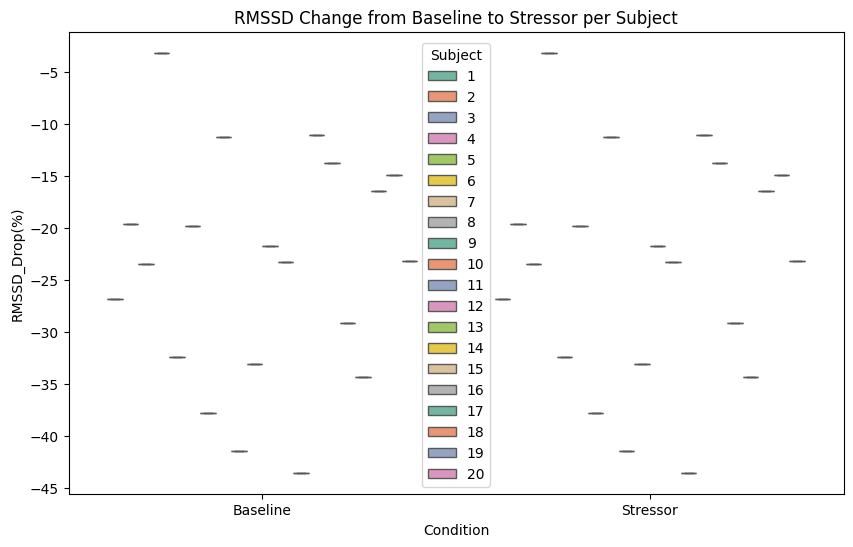

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the RMSSD changes
plt.figure(figsize=(10, 6))
sns.boxplot(data=hrv_df, x='Condition', y='RMSSD_Drop(%)', hue='Subject', palette='Set2')
plt.title("RMSSD Change from Baseline to Stressor per Subject")
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_6992\1998762353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hrv_df, x='Condition', y='HRV_RMSSD', palette='Set2')


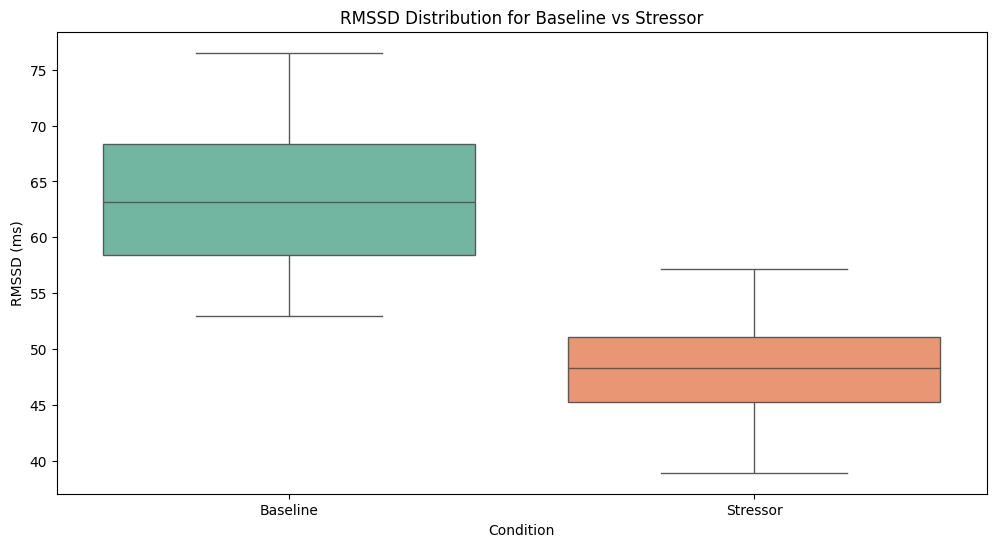

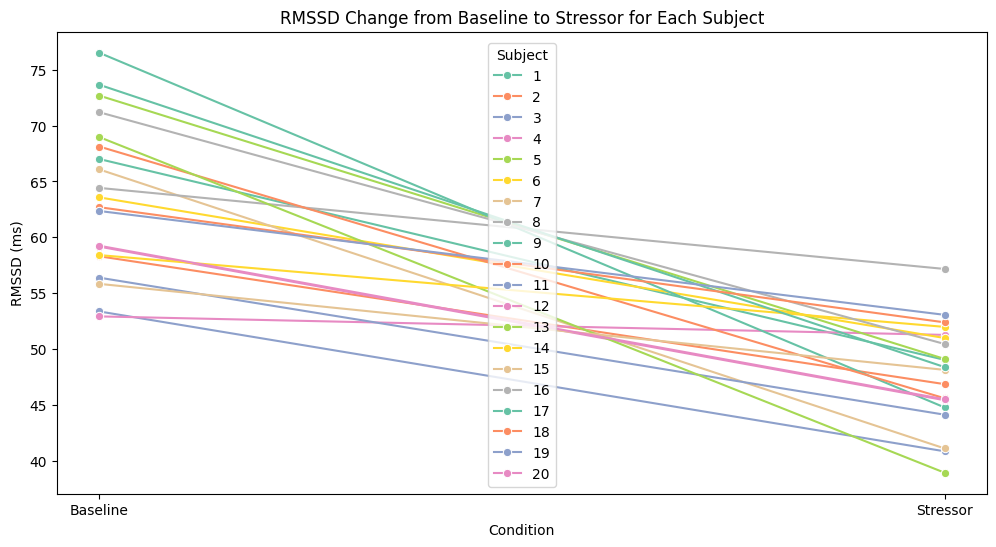

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting RMSSD across conditions (Baseline vs Stressor)
plt.figure(figsize=(12, 6))

# Boxplot for RMSSD distribution
sns.boxplot(data=hrv_df, x='Condition', y='HRV_RMSSD', palette='Set2')
plt.title("RMSSD Distribution for Baseline vs Stressor")
plt.ylabel("RMSSD (ms)")
plt.show()

# Lineplot of RMSSD changes for each subject
plt.figure(figsize=(12, 6))
sns.lineplot(data=hrv_df, x='Condition', y='HRV_RMSSD', hue='Subject', marker='o', palette='Set2')
plt.title("RMSSD Change from Baseline to Stressor for Each Subject")
plt.ylabel("RMSSD (ms)")
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_6992\1998762353.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hrv_df, x='Condition', y='HRV_RMSSD', palette='Set2')


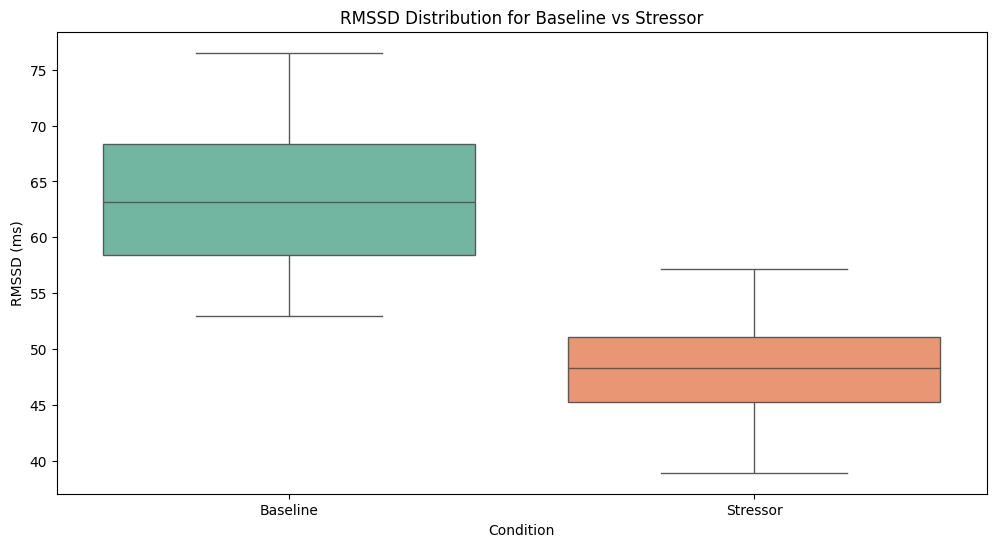

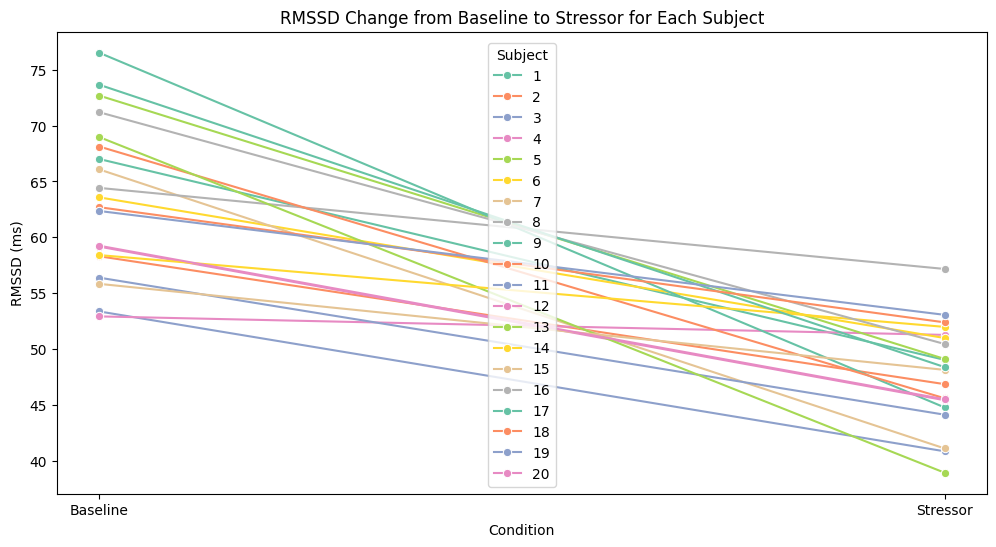

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting RMSSD across conditions (Baseline vs Stressor)
plt.figure(figsize=(12, 6))

# Boxplot for RMSSD distribution
sns.boxplot(data=hrv_df, x='Condition', y='HRV_RMSSD', palette='Set2')
plt.title("RMSSD Distribution for Baseline vs Stressor")
plt.ylabel("RMSSD (ms)")
plt.show()

# Lineplot of RMSSD changes for each subject
plt.figure(figsize=(12, 6))
sns.lineplot(data=hrv_df, x='Condition', y='HRV_RMSSD', hue='Subject', marker='o', palette='Set2')
plt.title("RMSSD Change from Baseline to Stressor for Each Subject")
plt.ylabel("RMSSD (ms)")
plt.show()


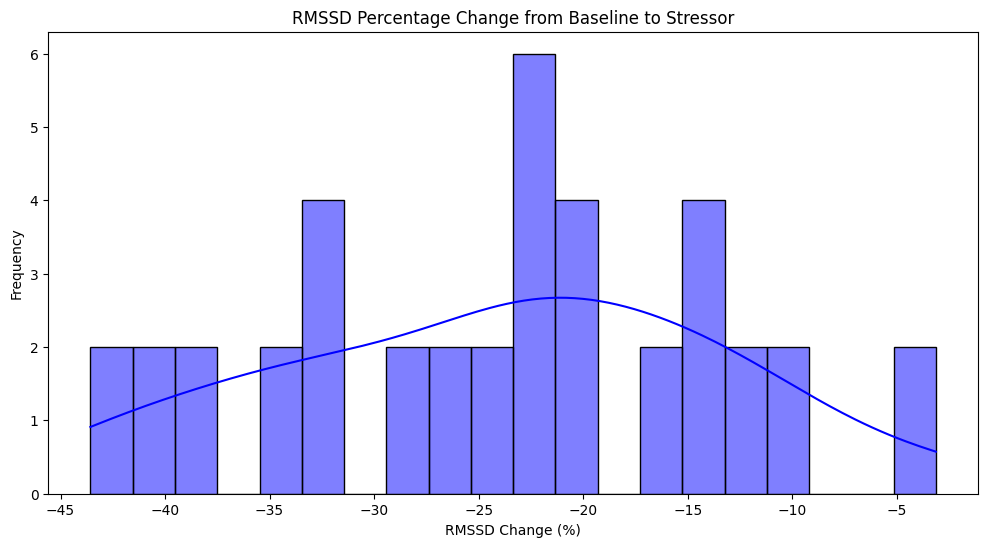

In [14]:
# Distribution of RMSSD Drop percentage across all subjects
plt.figure(figsize=(12, 6))
sns.histplot(hrv_df['RMSSD_Drop(%)'], kde=True, bins=20, color='blue')
plt.title("RMSSD Percentage Change from Baseline to Stressor")
plt.xlabel("RMSSD Change (%)")
plt.ylabel("Frequency")
plt.show()


In [15]:
# Correlation matrix of HRV features
hrv_features = hrv_df[['HRV_RMSSD', 'HRV_SDNN', 'HRV_LF', 'HRV_HF', 'RMSSD_Drop(%)', 'SDNN_Drop(%)']]
corr_matrix = hrv_features.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of HRV Features")
plt.show()


KeyError: "['SDNN_Drop(%)'] not in index"